In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [2]:
manip = ExperimentClass.Experiment("20240327_NPQ_lincomycin", "SpeedZen")

In [3]:
normalising_vector = []
for col in manip.Data.columns:
    normalising_vector.append(manip.Data[col][6])
manip.Data = manip.Data.div(normalising_vector, axis=1)

manip.annotations

,E,souche,conc_linc_mM,actinic_light,illumination,ilum_add_linc
0,11,stt7A,0,740,0,-1
1,12,stt7A,0,740,0,-1
2,13,stt7A,0,740,0,-1
3,14,stt7A,0,740,0,-1
4,21,stt7A,0,740,0,1
...,...,...,...,...,...,...
75,224,stt7A,1,740,3,3
76,231,stt7A,1,740,3,0
77,232,stt7A,1,740,3,0
78,233,stt7A,1,740,3,0


C:\Users\Orlando\AppData\Local\Temp\ipykernel_4328\2416895437.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


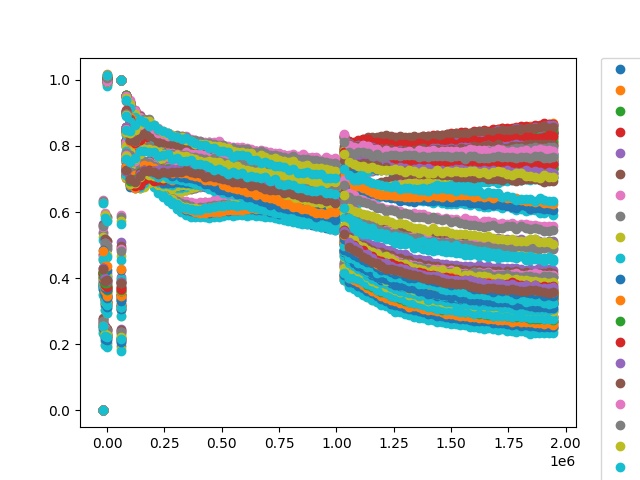

In [4]:
fig, ax = plt.subplots()
for i, col in enumerate(manip.Data.columns):
    ax.plot(manip.Time, manip.Data[col], 'o', label=col)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()

In [5]:
def get_kinetics(time, data):
    time_Fstat = time[3::2]/(1000*60)
    Fstat = data[3::2]
    time_Fmax = time[4::2]/(1000*60)
    Fmax = data[4::2]
    return time_Fstat, Fstat, time_Fmax, Fmax


In [6]:
time_Fstat = []
time_Fmax = []
Fstat = []
Fmax = []
Phi_PSII = []
NPQ = []
for recor in manip.annotations.E:
    aux_time_Fstat, aux_Fstat, aux_time_Fmax, aux_Fmax = get_kinetics(manip.Time, manip.Data[f"E{recor}"])
    time_Fstat.append(aux_time_Fstat)
    Fstat.append(aux_Fstat)
    time_Fmax.append(aux_time_Fmax)
    Fmax.append(aux_Fmax)
    Phi_PSII.append((Fmax[-1].values-Fstat[-1].values)/Fmax[-1].values)
    NPQ.append((Fmax[-1].values[0]-Fmax[-1].values)/Fmax[-1].values)

time_Fstat = np.array(time_Fstat)
time_Fmax = np.array(time_Fmax)
Fstat = np.array(Fstat)
Fmax = np.array(Fmax)
Phi_PSII = np.array(Phi_PSII)
NPQ = np.array(NPQ)

In [7]:
def light_bar(ax, time_vector, light_on, light_off, intensity):
    scale = ax.get_ylim()[1] - ax.get_ylim()[0]
    up = ax.get_ylim()[0] + scale*0.1
    down = up - scale*0.06
    time = np.linspace(time_vector[0], time_vector[-1], 1000)
    ax.fill_between(time, down, up, color='black', where=(time < light_on) | (time > light_off))
    ax.fill_between(time, down, up, color='yellow', where=(time >= light_on) & (time <= light_off))
    ax.axvline(light_on, color='k', linestyle='--', alpha=0.5, linewidth=0.5)
    ax.axvline(light_off, color='k', linestyle='--', alpha=0.5, linewidth=0.5)
    
    ax.text((light_off-light_on)/2, up - scale*0.035, f"{intensity} $µE m^{{-2}} s^{{-1}}$", horizontalalignment='center', verticalalignment='center', fontsize=11)

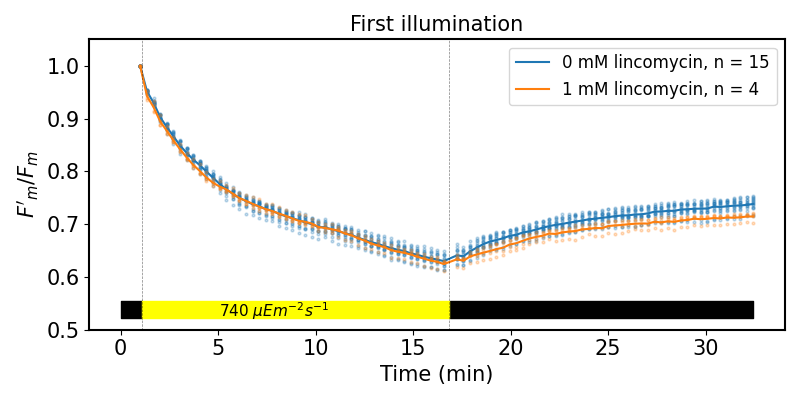

In [20]:

illumination = 0

records_control = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] == 0)].E)
records_linco = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] != 0)].E)

marker = 2
line = 1.5
fig, ax = plt.subplots(figsize=(8, 4))
aux = 0
aux_y = []
for i in records_control[1:]:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C0", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C0", label= f"0 mM lincomycin, n = {len(records_control)-1}")
    

aux = 0
aux_y = []
for i in records_linco:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C1", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C1", label= f"1 mM lincomycin, n = {len(records_linco)}")
    


ax.legend(fontsize=12, loc='upper right')

ax = tools.poster_axes(ax, title = "First illumination", xlabel = "Time (min)", ylabel = "$F'_m/F_m$", legendfontsize=12)
ax.set_ylim(0.5, 1.05)

light_bar(ax, time_Fmax[0], 1.1, 16.86, 740)

fig.tight_layout()
fig.savefig(manip.fig_folder + "/illum_0.png", dpi=300)   


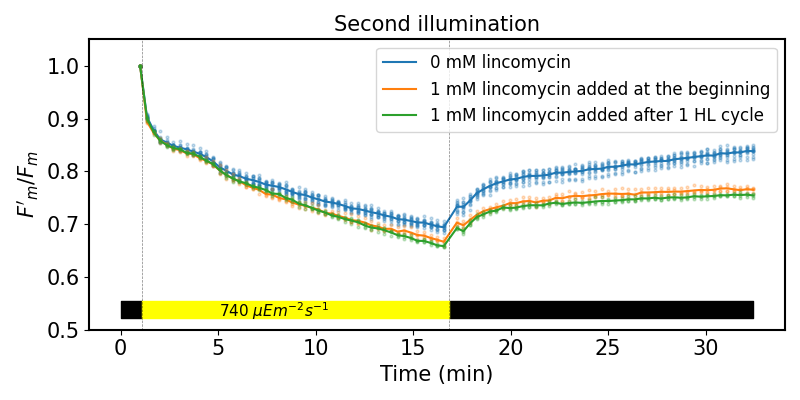

In [9]:

illumination = 1

records_control = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] == 0)].E)
records_linco_0 = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] != 0) & (manip.annotations["ilum_add_linc"] == 0)].E)
records_linco_1 = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] != 0) & (manip.annotations["ilum_add_linc"] == 1)].E)

marker = 2
line = 1.5
fig, ax = plt.subplots(figsize=(8, 4))
aux = 0
aux_y = []
for i in records_control:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C0", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C0", label= "0 mM lincomycin")
    

aux = 0
aux_y = []
for i in records_linco_0:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C1", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C1", label= "1 mM lincomycin added at the beginning")

aux = 0
aux_y = []
for i in records_linco_1:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C2", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C2", label= "1 mM lincomycin added after 1 HL cycle")
    


ax.legend(fontsize=12, loc='upper right')

ax = tools.poster_axes(ax, title = "Second illumination", xlabel = "Time (min)", ylabel = "$F'_m/F_m$", legendfontsize=12)

ax.set_ylim(0.5, 1.05)

light_bar(ax, time_Fmax[0], 1.1, 16.86, 740)

fig.tight_layout()
fig.savefig(manip.fig_folder + "/illum_1.png", dpi=300)   


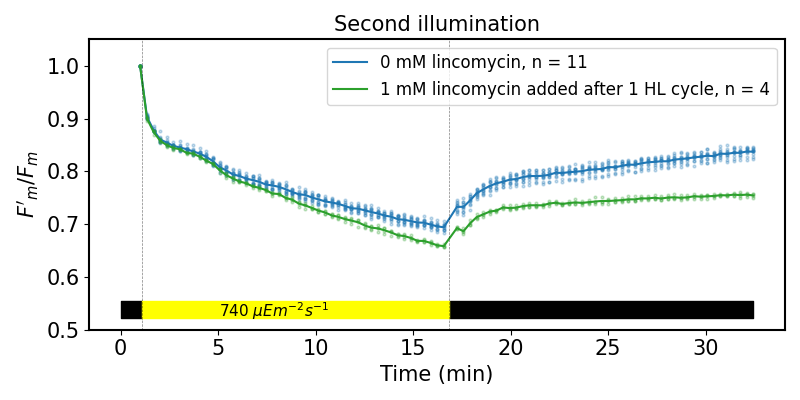

In [21]:
illumination = 1

records_control = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] == 0)].E)
records_linco_1 = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] != 0) & (manip.annotations["ilum_add_linc"] == 1)].E)

marker = 2
line = 1.5
fig, ax = plt.subplots(figsize=(8, 4))
aux = 0
aux_y = []
for i in records_control[1:]:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C0", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C0", label= f"0 mM lincomycin, n = {len(records_control)-1}")
    

aux = 0
aux_y = []
for i in records_linco_1:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C2", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C2", label= f"1 mM lincomycin added after 1 HL cycle, n = {len(records_linco_1)}")
    


ax.legend(fontsize=12, loc='upper right')
ax.set_ylabel("$F_{max}$", fontsize=14)
ax.set_xlabel("Time (min)", fontsize=12)

ax = tools.poster_axes(ax, title = "Second illumination", xlabel = "Time (min)", ylabel = "$F'_m/F_m$", legendfontsize=12)

ax.set_ylim(0.5, 1.05)

light_bar(ax, time_Fmax[0], 1.1, 16.86, 740)

fig.tight_layout()
fig.savefig(manip.fig_folder + "/illum_1_compare.png", dpi=300)   


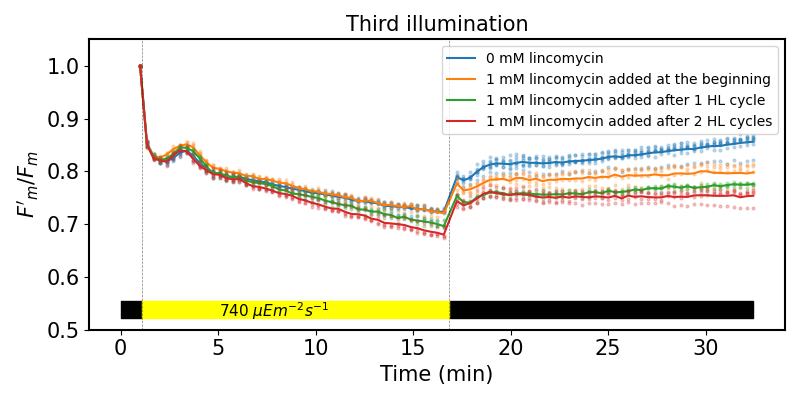

In [11]:
illumination = 2

records_control = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] == 0)].E)
records_linco_0 = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] != 0) & (manip.annotations["ilum_add_linc"] == 0)].E)
records_linco_1 = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] != 0) & (manip.annotations["ilum_add_linc"] == 1)].E)
records_linco_2 = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] != 0) & (manip.annotations["ilum_add_linc"] == 2)].E)

marker = 2
line = 1.5
fig, ax = plt.subplots(figsize=(8, 4))
aux = 0
aux_y = []
for i in records_control:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C0", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C0", label= "0 mM lincomycin")
    

aux = 0
aux_y = []
for i in records_linco_0:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C1", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C1", label= "1 mM lincomycin added at the beginning")

aux = 0
aux_y = []
for i in records_linco_1:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C2", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C2", label= "1 mM lincomycin added after 1 HL cycle")

aux = 0
aux_y = []
for i in records_linco_2:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C3", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C3", label= "1 mM lincomycin added after 2 HL cycles")
    


ax.legend(fontsize=10, loc='upper right')
ax.set_ylabel("$F_{max}$", fontsize=14)
ax.set_xlabel("Time (min)", fontsize=12)

ax = tools.poster_axes(ax, title = "Third illumination", xlabel = "Time (min)", ylabel = "$F'_m/F_m$", legendfontsize=10)

ax.set_ylim(0.5, 1.05)

light_bar(ax, time_Fmax[0], 1.1, 16.86, 740)

fig.tight_layout()
fig.savefig(manip.fig_folder + "/illum_2.png", dpi=300)   


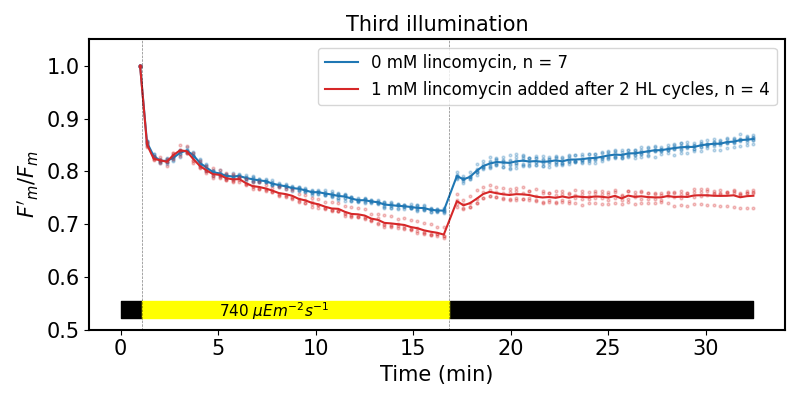

In [22]:
illumination = 2

records_control = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] == 0)].E)
records_linco_2 = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] != 0) & (manip.annotations["ilum_add_linc"] == 2)].E)

marker = 2
line = 1.5
fig, ax = plt.subplots(figsize=(8, 4))
aux = 0
aux_y = []
for i in records_control[1:]:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C0", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C0", label= f"0 mM lincomycin, n = {len(records_control)-1}")
    

aux = 0
aux_y = []
for i in records_linco_2:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C3", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C3", label= f"1 mM lincomycin added after 2 HL cycles, n = {len(records_linco_2)}")
    


ax.legend(fontsize=10, loc='upper right')
ax.set_ylabel("$F_{max}$", fontsize=14)
ax.set_xlabel("Time (min)", fontsize=12)

ax = tools.poster_axes(ax, title = "Third illumination", xlabel = "Time (min)", ylabel = "$F'_m/F_m$", legendfontsize=12)

ax.set_ylim(0.5, 1.05)

light_bar(ax, time_Fmax[0], 1.1, 16.86, 740)

fig.tight_layout()
fig.savefig(manip.fig_folder + "/illum_2_compare.png", dpi=300)   


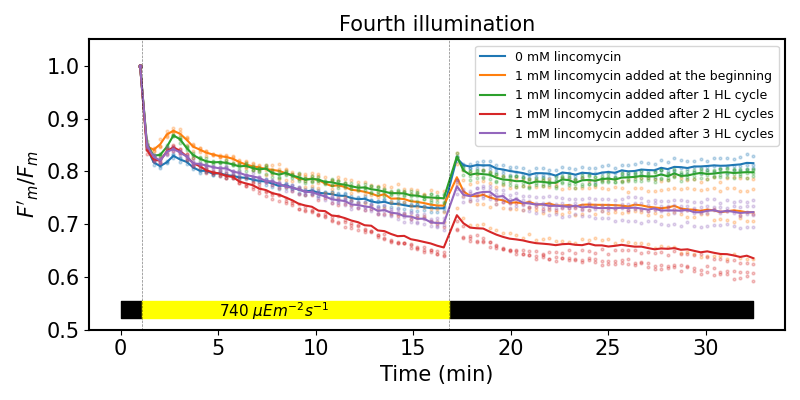

In [17]:
illumination = 3

records_control = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] == 0)].E)
records_linco_0 = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] != 0) & (manip.annotations["ilum_add_linc"] == 0)].E)
records_linco_1 = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] != 0) & (manip.annotations["ilum_add_linc"] == 1)].E)
records_linco_2 = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] != 0) & (manip.annotations["ilum_add_linc"] == 2)].E)
records_linco_3 = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] != 0) & (manip.annotations["ilum_add_linc"] == 3)].E)

marker = 2
line = 1.5
fig, ax = plt.subplots(figsize=(8, 4))
aux = 0
aux_y = []
for i in records_control[1:]:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C0", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C0", label= "0 mM lincomycin")
    

aux = 0
aux_y = []
for i in records_linco_0:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C1", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C1", label= "1 mM lincomycin added at the beginning")

aux = 0
aux_y = []
for i in records_linco_1:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C2", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C2", label= "1 mM lincomycin added after 1 HL cycle")

aux = 0
aux_y = []
for i in records_linco_2:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C3", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C3", label= "1 mM lincomycin added after 2 HL cycles")

aux = 0
aux_y = []
for i in records_linco_3:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C4", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C4", label= "1 mM lincomycin added after 3 HL cycles")

ax.legend(fontsize=9, loc='upper right')
ax.set_ylabel("$F_{max}$", fontsize=14)
ax.set_xlabel("Time (min)", fontsize=12)

ax = tools.poster_axes(ax, title = "Fourth illumination", xlabel = "Time (min)", ylabel = "$F'_m/F_m$", legendfontsize=9)

ax.set_ylim(0.5, 1.05)

light_bar(ax, time_Fmax[0], 1.1, 16.86, 740)

fig.tight_layout()
fig.savefig(manip.fig_folder + "/illum_3.png", dpi=300)   


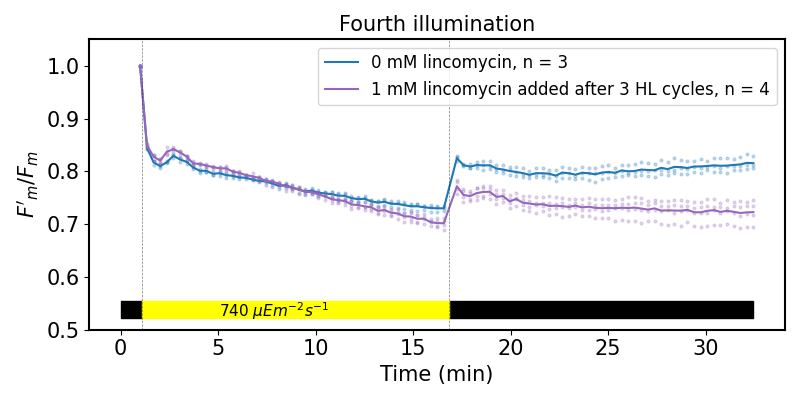

In [24]:
illumination = 3

records_control = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] == 0)].E)
records_linco_3 = list(manip.annotations[(manip.annotations["illumination"] == illumination) & (manip.annotations["conc_linc_mM"] != 0) & (manip.annotations["ilum_add_linc"] == 3)].E)

marker = 2
line = 1.5
fig, ax = plt.subplots(figsize=(8, 4))
aux = 0
aux_y = []
for i in records_control[1:]:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C0", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C0", label= f"0 mM lincomycin, n = {len(records_control)-1}")

aux = 0
aux_y = []
for i in records_linco_3:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], 'o', markersize = marker, linewidth = 0.5, color = "C4", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C4", label= f"1 mM lincomycin added after 3 HL cycles, n = {len(records_linco_3)}")

ax.legend(fontsize=9, loc='upper right')
ax.set_ylabel("$F_{max}$", fontsize=14)
ax.set_xlabel("Time (min)", fontsize=12)

ax = tools.poster_axes(ax, title = "Fourth illumination", xlabel = "Time (min)", ylabel = "$F'_m/F_m$", legendfontsize=12)

ax.set_ylim(0.5, 1.05)

light_bar(ax, time_Fmax[0], 1.1, 16.86, 740)

fig.tight_layout()
fig.savefig(manip.fig_folder + "/illum_3_compare.png", dpi=300)   
